# Bank customer churn

In this analysis, we delve into the "Bank customer churn" dataset, examining various factors that influence customers' decisions to leave a bank. The dataset comprises several variables, each potentially affecting customer churn differently.
We recognize that acquiring new clients is more costly than retaining existing ones. Thus, understanding the factors driving customer churn is crucial for banks. By preventing churn, companies can develop loyalty programs and retention campaigns to retain as many customers as possible.

Additionally, we will focus on developing predictive models to anticipate such behavior. By leveraging machine learning algorithms and predictive analytics, we aim to forecast the likelihood of customer churn based on various factors present in the dataset. These models will enable banks to proactively identify at-risk customers and intervene with targeted retention strategies.

**Columns description**

No| Column Name| Description
---| --- | ---
1 | **RowNumber** | corresponds to the record (row) number and has no effect on the output.
2 | **CustomerId** | contains random values and has no effect on customer leaving the bank.
3 | **Surname** | the surname of a customer has no impact on their decision to leave the bank.
4 | **CreditScore** | can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5 | **Geography** | a customer’s location can affect their decision to leave the bank.
6 | **Gender** | —it’s interesting to explore whether gender plays a role in a customer leaving the bank.
7 | **Age** | this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8 | **Tenure** | refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9 | **Balance** | also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10 | **NumOfProducts** | efers to the number of products that a customer has purchased through the bank.
11 | **HasCrCard** | denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12 | **IsActiveMember** | active customers are less likely to leave the bank.
13 | **EstimatedSalary** | as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14 | **Exited** | whether or not the customer left the bank.
15 | **Complain** | customer has complaint or not.
16 | **Satisfaction Score** | Score provided by the customer for their complaint resolution.
17 | **Card Type**| type of card hold by the customer.
18 | **Points Earned**| the points earned by the customer for using credit card.

Orginal dataset:
https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

## Table of Contents

1. [ Import libraries](#1)

2. [ Import data](#2)

3. [Explore data](#3)

4. [Exploratory data analysis](#4)

   4.1. [Categorical Variables](#4.1)

   4.2. [Continuous Variables](#4.2)
   
   4.3. [Analysis of variable Exited](#4.3)

   4.4. [Analysis of variable Complain](#4.4)

   4.5. [Correlation heatmap](#4.5)

5. [Model Building](#5)

   5.1. [Random Forest Classifier](#5.1)

   5.2. [XGboost](#5.2)

   5.3. [Catboost](#5.3)  







# 1. <a name='1'></a>Import libraries

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


palette = ['#4CC9F0', "#5C15A3", "#3A0CA3", "#4361EE", "#F72585"]
sns.set(palette=palette, rc={'figure.figsize':(9.7,6.27)})

# <a name='2'></a>2. Import data

In [87]:
raw_data = pd.read_csv('Customer-Churn-Records.csv')

In [88]:
df = raw_data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# <a name='3'></a> 3. Explore data

In [89]:
df.shape

(10000, 18)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [91]:
df.columns = [column.replace(' ', '') for column in df.columns]

In [92]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [93]:
df.describe(include=['object'])

,Surname,Geography,Gender,CardType
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [94]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Complain             0
SatisfactionScore    0
CardType             0
PointEarned          0
dtype: int64

# <a name='4'></a> 4. Exploratory data analysis

## <a name='4.1'></a> 4.1 Categorical Variables

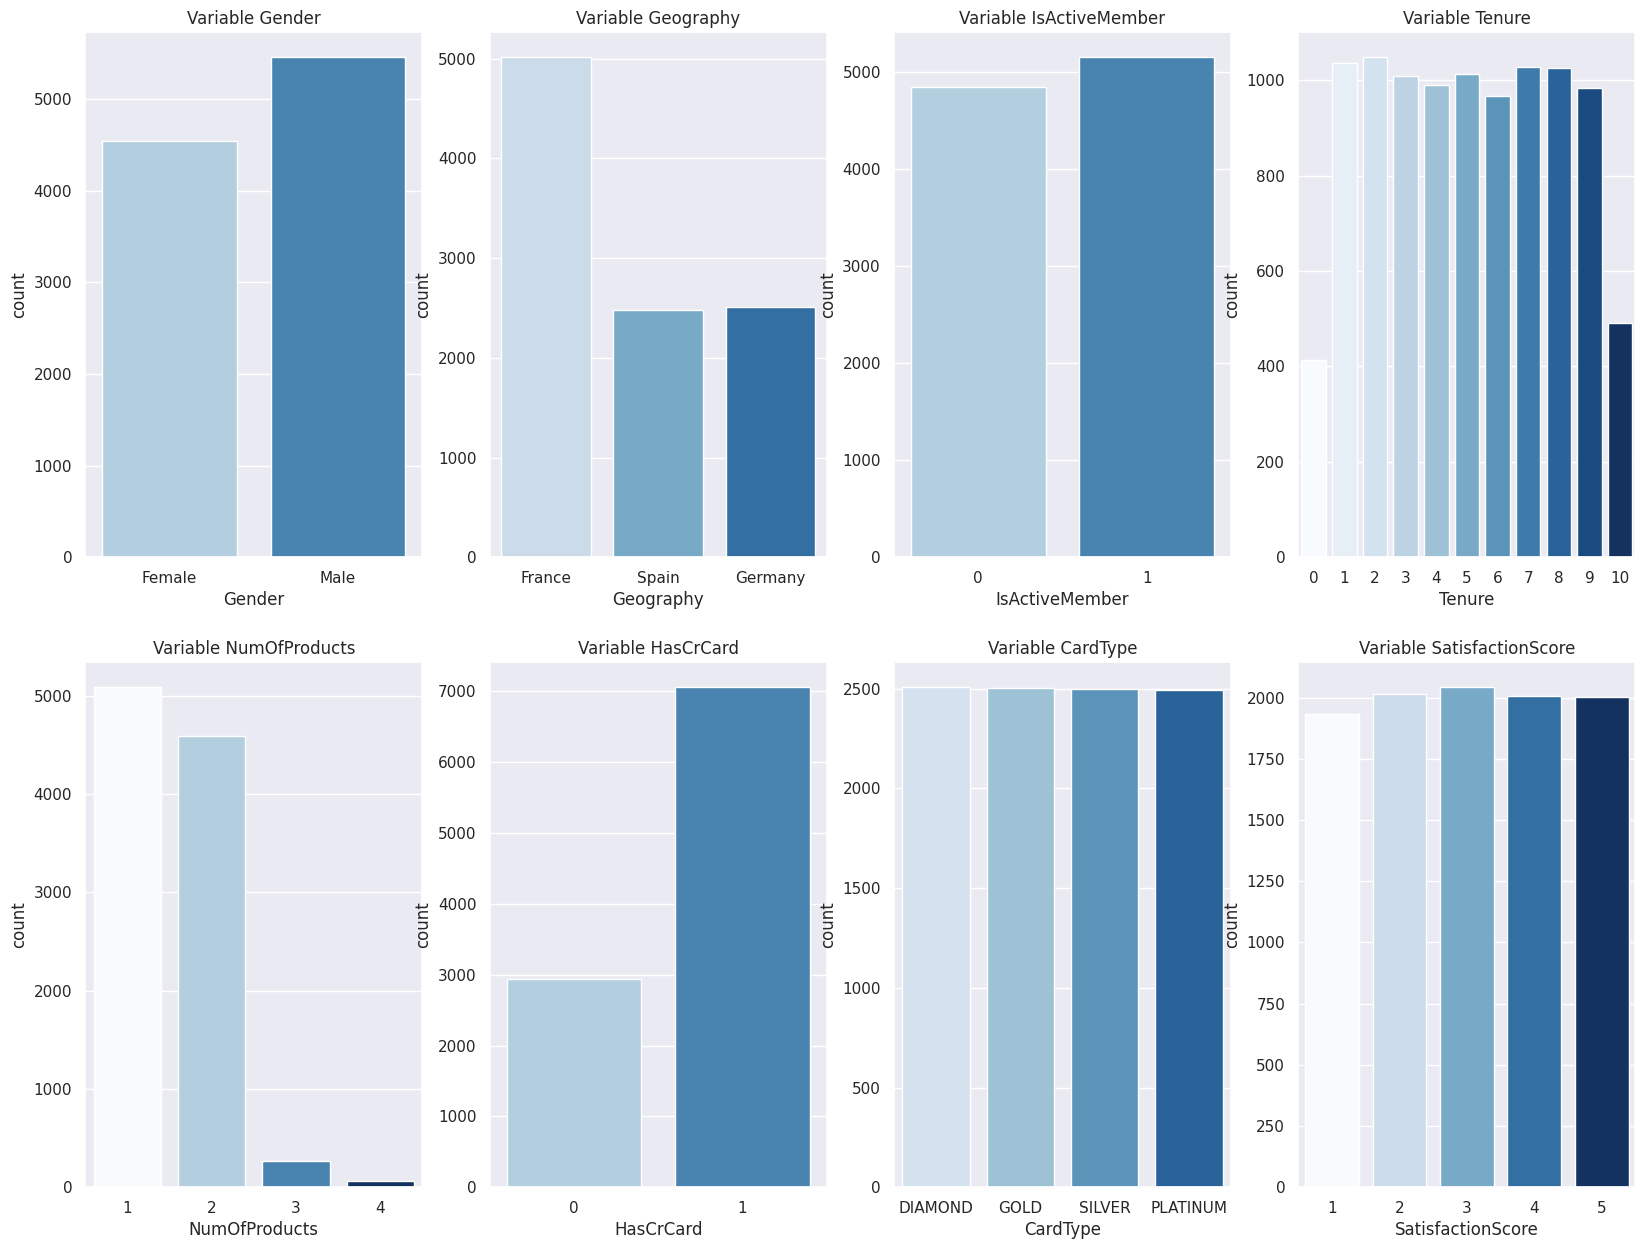

In [95]:
fig, axes = plt.subplots(2, 4, figsize=(20,15))

sns.countplot(ax=axes[0, 0], data=df, x='Gender', hue='Gender',legend=False, palette='Blues')
sns.countplot(ax=axes[0, 1], data=df, x='Geography', hue='Geography', legend=False, palette='Blues')
sns.countplot(ax=axes[0, 2], data=df, x='IsActiveMember', hue='IsActiveMember',legend=False,palette='Blues')
sns.countplot(ax=axes[0, 3], data=df, x='Tenure', hue='Tenure',legend=False, palette='Blues')
sns.countplot(ax=axes[1, 0], data=df, x='NumOfProducts', hue='NumOfProducts',legend=False, palette='Blues')
sns.countplot(ax=axes[1, 1], data=df, x='HasCrCard', hue='HasCrCard',legend=False, palette='Blues')
sns.countplot(ax=axes[1, 2], data=df, x='CardType', hue='CardType',legend=False, palette='Blues')
sns.countplot(ax=axes[1, 3], data=df, x='SatisfactionScore', hue='SatisfactionScore',legend=False, palette='Blues')

axes[0][0].set_title('Variable Gender')
axes[0][1].set_title('Variable Geography')
axes[0][2].set_title('Variable IsActiveMember')
axes[0][3].set_title('Variable Tenure')
axes[1][0].set_title('Variable NumOfProducts')
axes[1][1].set_title('Variable HasCrCard')
axes[1][2].set_title('Variable CardType')
axes[1][3].set_title('Variable SatisfactionScore')

## <a name='4.2'></a> 4.2 Continuous Variables

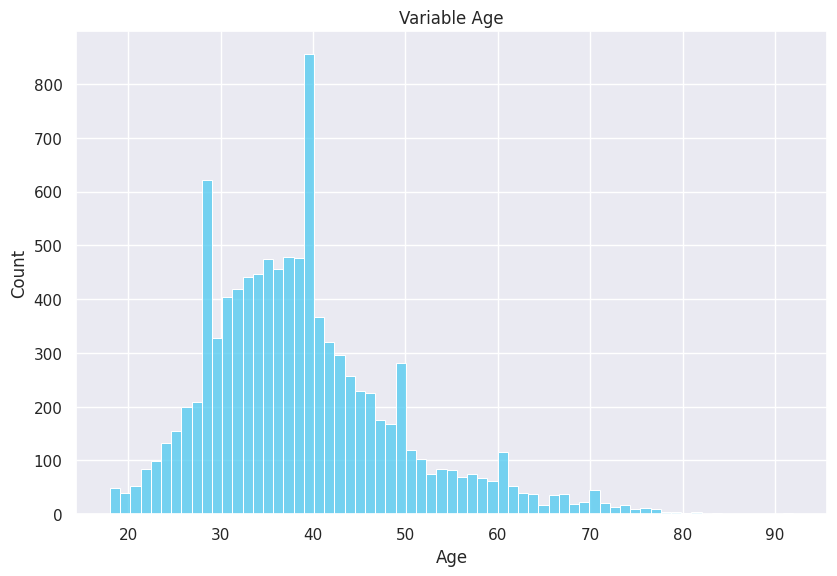

In [96]:
_ = sns.histplot(x = df['Age'], kde = False).set_title('Variable Age')

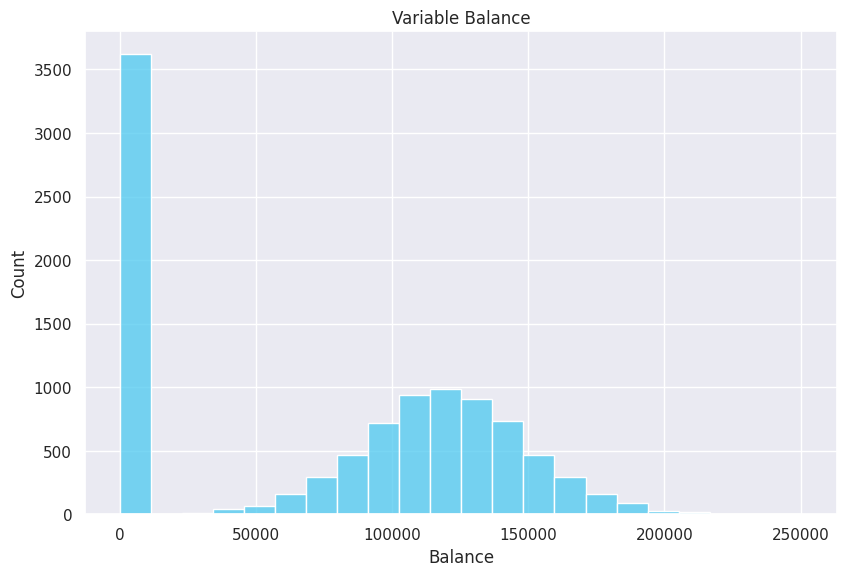

In [97]:
_ = sns.histplot(x = df['Balance'], kde = False).set_title('Variable Balance')

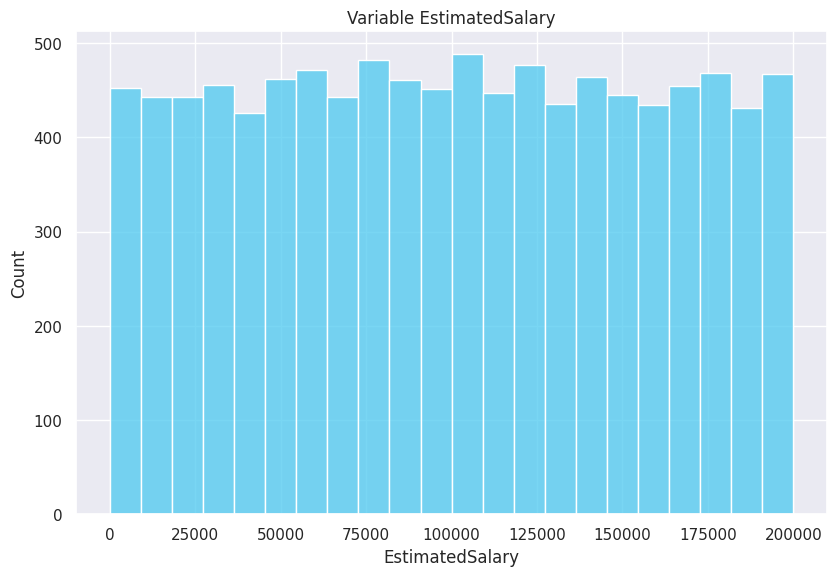

In [98]:
_ = sns.histplot(x = df['EstimatedSalary'], kde = False).set_title('Variable EstimatedSalary')

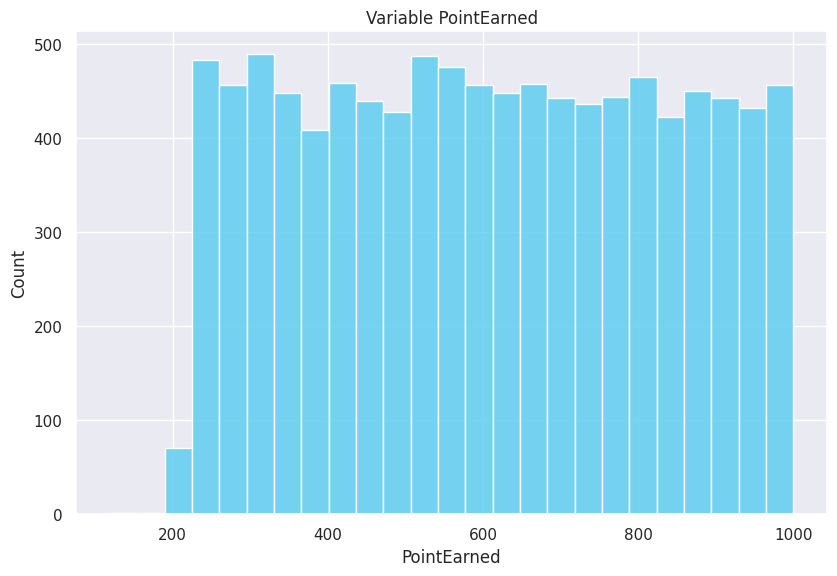

In [99]:
_ = sns.histplot(x = df['PointEarned'], kde = False).set_title('Variable PointEarned')

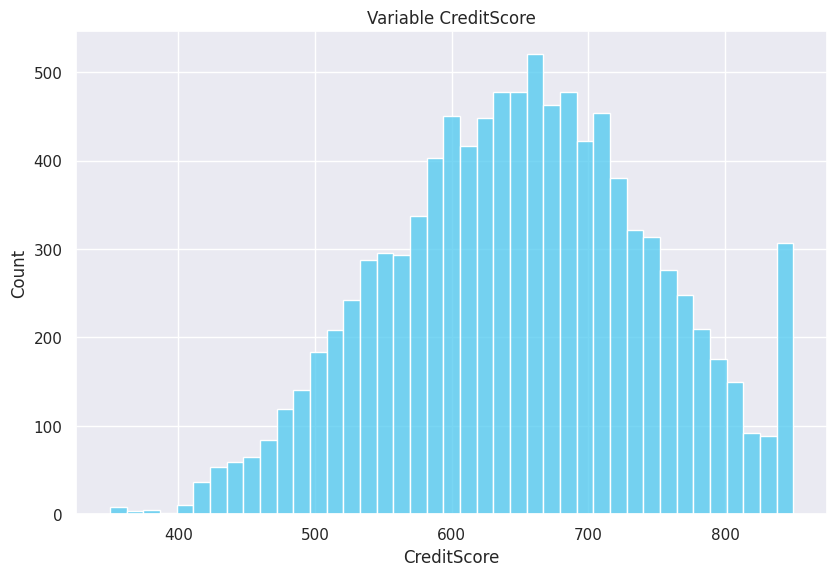

In [100]:
_ = sns.histplot(x = df['CreditScore'], kde = False).set_title('Variable CreditScore')

## <a name='4.3'></a> 4.3 Analysis of variable Exited

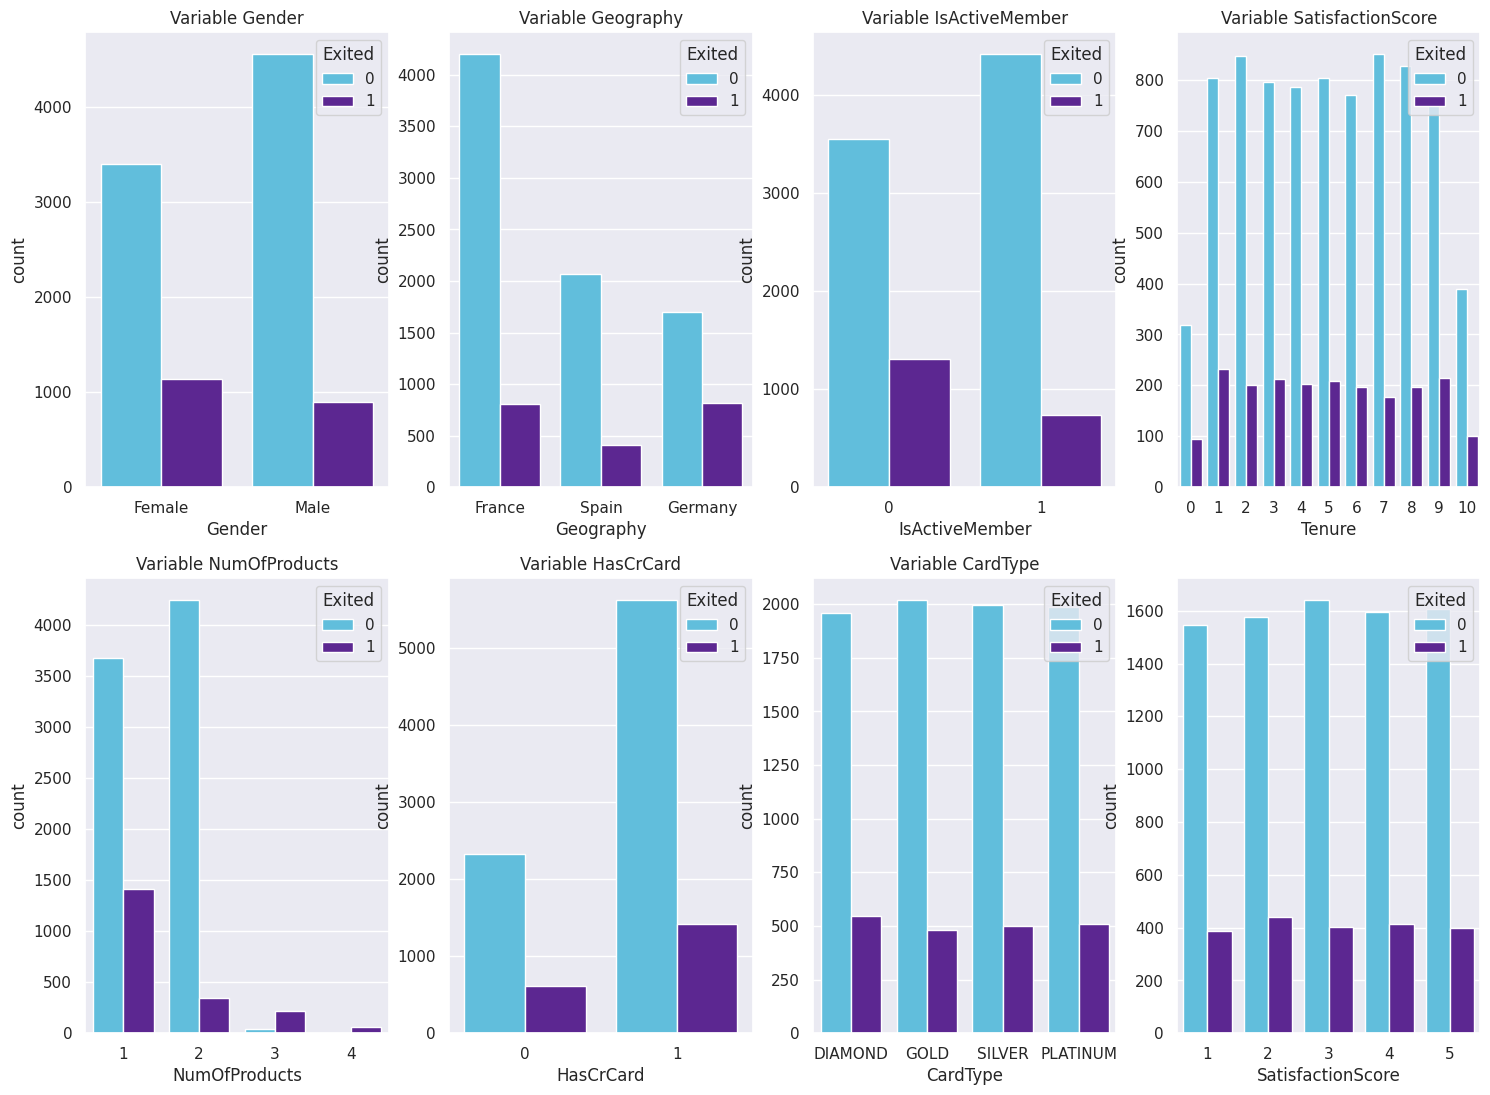

In [101]:
fig, ax = plt.subplots(2, 4, figsize=(18,13))

sns.countplot(ax=ax[0, 0], data=df, x='Gender', hue='Exited')
sns.countplot(ax=ax[0, 1], data=df, x='Geography', hue='Exited')
sns.countplot(ax=ax[0, 2], data=df, x='IsActiveMember', hue='Exited')
sns.countplot(ax=ax[0, 3], data=df, x='Tenure', hue='Exited')
sns.countplot(ax=ax[1, 0], data=df, x='NumOfProducts', hue='Exited')
sns.countplot(ax=ax[1, 1], data=df, x='HasCrCard', hue='Exited')
sns.countplot(ax=ax[1, 2], data=df, x='CardType', hue='Exited')
sns.countplot(ax=ax[1, 3], data=df, x='SatisfactionScore', hue='Exited')

ax[0][0].set_title('Variable Gender')
ax[0][1].set_title('Variable Geography')
ax[0][2].set_title('Variable IsActiveMember')
ax[0][3].set_title('Variable Tenure')
ax[1][0].set_title('Variable NumOfProducts')
ax[1][1].set_title('Variable HasCrCard')
ax[1][2].set_title('Variable CardType')
ax[0][3].set_title('Variable SatisfactionScore')

Boxplots

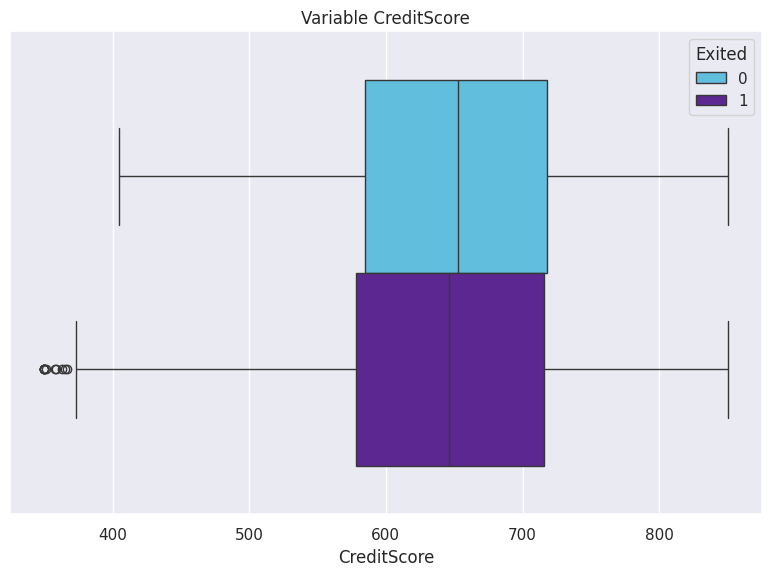

In [102]:
_ = sns.boxplot(data=df, x='CreditScore', hue='Exited').set_title('Variable CreditScore')

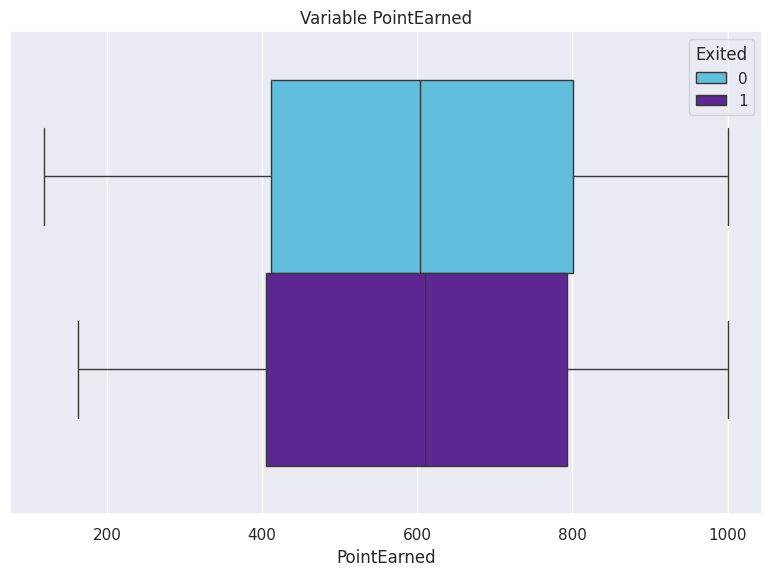

In [103]:
_ = sns.boxplot(data=df, x='PointEarned', hue='Exited').set_title('Variable PointEarned')

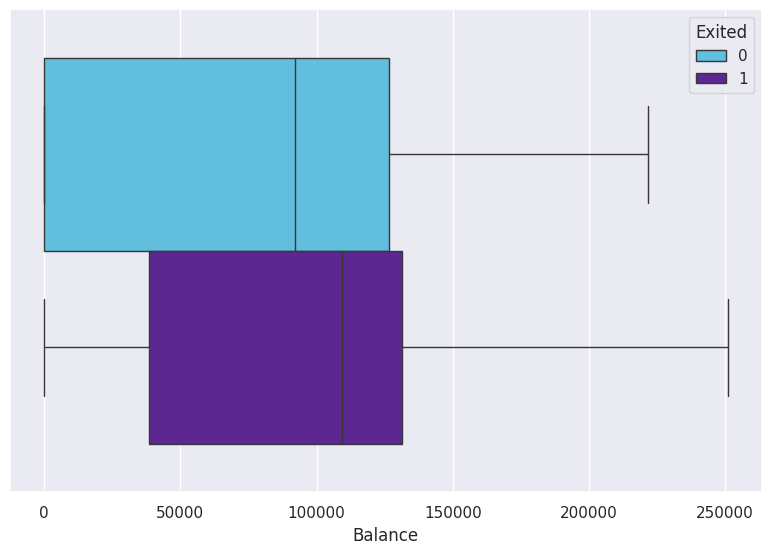

In [104]:
_ = sns.boxplot(data=df, x='Balance', hue='Exited')

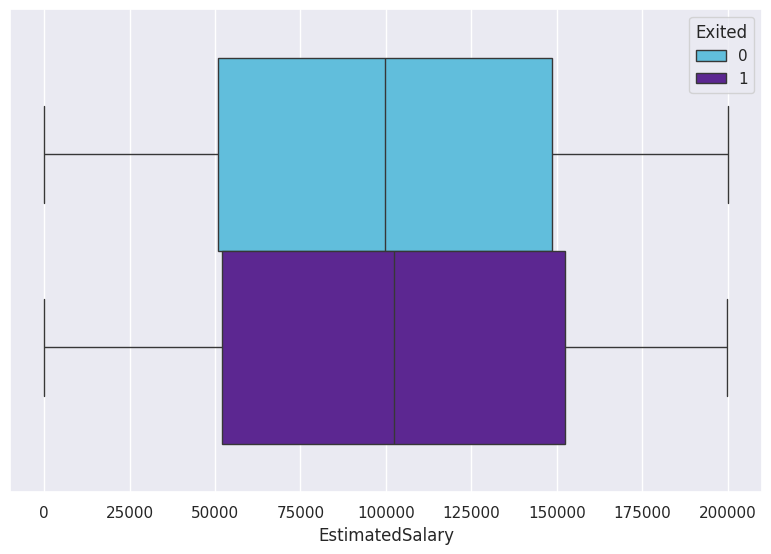

In [105]:
_ = sns.boxplot(data=df, x='EstimatedSalary', hue='Exited')

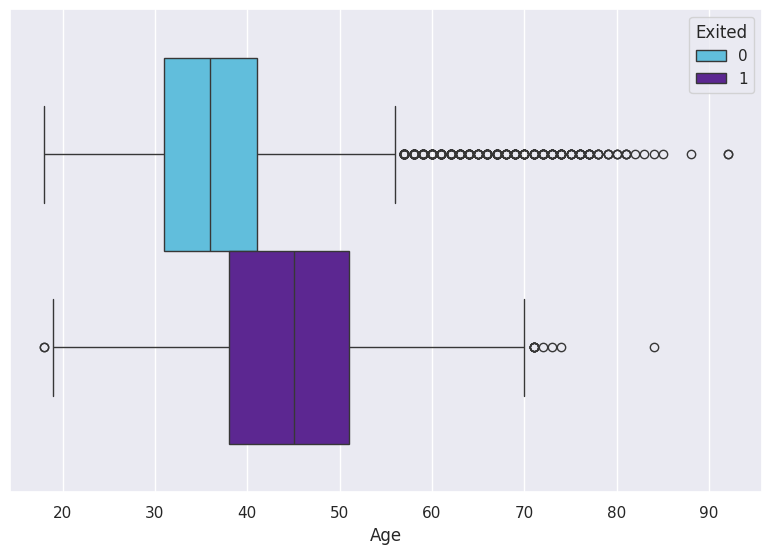

In [106]:
_ = sns.boxplot(data=df, x='Age', hue='Exited')

## <a name='4.4'></a> 4.4 Analysis of variable Complain

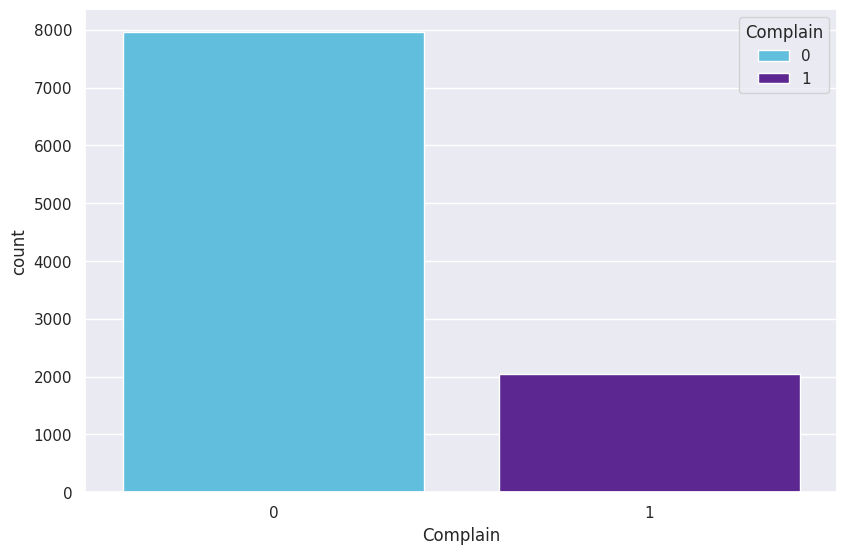

In [107]:
_ = sns.countplot(data=df, x='Complain', hue='Complain')

In [108]:
df.groupby(['Complain', 'Exited']).count()['RowNumber']

Complain  Exited
0         0         7952
          1            4
1         0           10
          1         2034
Name: RowNumber, dtype: int64

In [109]:
print(f"The variable Complain overlaps with the variable Exited by {sum(df[df['Complain'] == df['Exited']].value_counts()) / sum(df.value_counts()) * 100}%")

The variable Complain overlaps with the variable Exited by 99.86%


This can be interpreted as a high level of similarity between these two variables or their strong correlation. It may suggest that there is some relationship or pattern between complaints (Complain) and whether a customer exited a particular service or product.

## <a name='4.5'></a> 4.5 Correlation heatmap

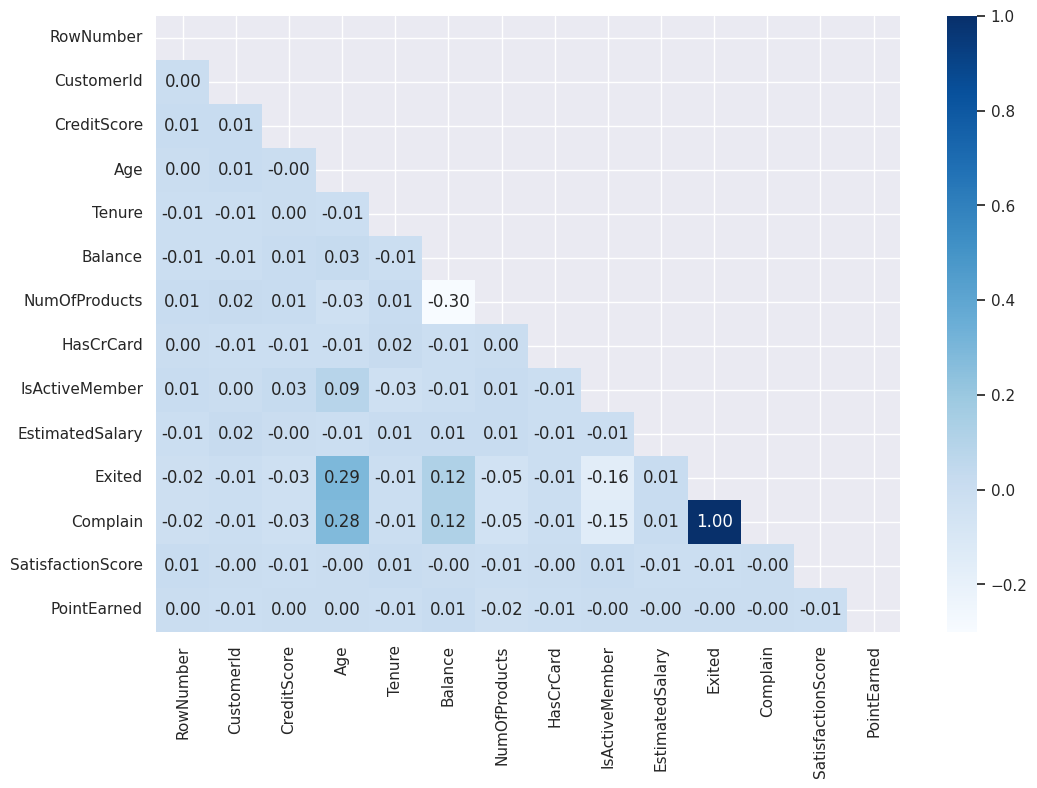

In [110]:
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))

plt.figure(figsize = (12,8))
sns.heatmap(round(df.corr(numeric_only=True),2), annot=True, cmap='Blues', mask=mask, fmt=".2f")

The variable "Complain" is perfectly correlated with the target variable "Exited" at a coefficient of one. Thus, it should be eliminated from the dataset to prevent multicollinearity issues and ensure model efficiency.

In [111]:
df.drop(['Complain'], inplace=True, axis=1)

# 5. <a name='5'></a>Model Building


In [112]:
# Drop unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)

In [113]:
# Split into X and y
y = df['Exited']
X = df.drop('Exited', axis=1, inplace=True)

In [114]:
# One-hot encoding on categorical columns
X = pd.get_dummies(df, drop_first=True)

In [115]:
# Standardize the features
scaler = StandardScaler()
X_ss = scaler.fit_transform(X)

### Split data

In [116]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.25)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (7500, 16)
X_test shape:  (2500, 16)
y_train shape:  (7500,)
y_test shape:  (2500,)


### Balancing classes

In [117]:
# Balance classes using RandomOverSampler

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

## <a name='5.1'></a> 5.1 Random Forest Classifier

In [39]:
# Instantiate a RandomForestClassifier object
random_forest = RandomForestClassifier()

# Define the parameter grid for the RandomForestClassifier
params_rf = {'n_estimators': [50, 100, 300, 500],
               'max_depth': [10, 25, 100, None],
               'min_samples_leaf': [1, 2, 4]}

# Instantiate a GridSearchCV object
grid_rf = GridSearchCV(estimator = random_forest,
                       param_grid = params_rf)

# Fit the GridSearchCV object to the training data
grid_rf.fit(X_train, y_train)


print('Score: ', grid_rf.best_score_)
print('N_estimators: ', grid_rf.best_estimator_.n_estimators)
print('Mín Samples Leaf: ', grid_rf.best_estimator_.min_samples_split)
print('Max Depth: ', grid_rf.best_estimator_.max_depth)

Score:  0.9599232015359693
N_estimators:  300
Mín Samples Leaf:  2
Max Depth:  100


In [40]:
# Instantiate a RandomForestClassifier object with the best parameters obtained from grid search
best_rf = RandomForestClassifier(**grid_rf.best_params_)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=300)

In [41]:
y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2011
           1       0.71      0.57      0.63       489

    accuracy                           0.87      2500
   macro avg       0.81      0.76      0.78      2500
weighted avg       0.86      0.87      0.87      2500



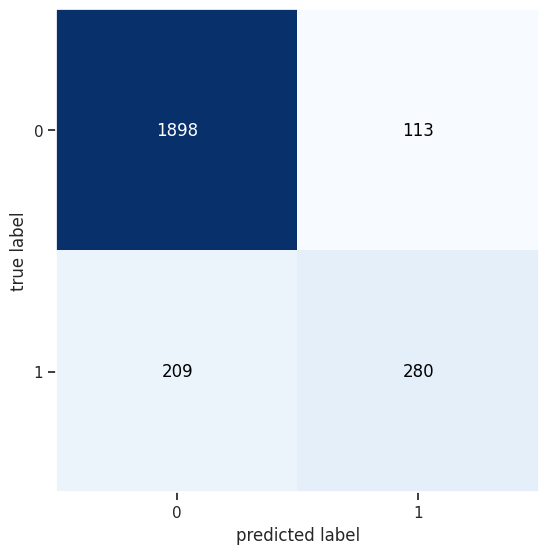

In [42]:
cm = confusion_matrix(y_test, y_pred_rf)
_ = plot_confusion_matrix(cm)

In [69]:
accuracy_score(y_test, y_pred_rf)

0.8712

## <a name='5.2'></a>5.2 XGboost

In [43]:
xgboost = XGBClassifier()

params_xgb = {'n_estimators': [100, 300, 500],
               'learning_rate': [0.3, 0.1, 0.01, 0.001],
               'max_depth': [3, 6, 8, 10],
                'colsample_bytree': [0.25, 0.5, 0.8]}


grid_xgb = GridSearchCV(estimator = xgboost,
                       param_grid = params_xgb)

grid_xgb.fit(X_train, y_train)

print('Score: ', grid_xgb.best_score_)
print('N_estimators: ', grid_xgb.best_estimator_.n_estimators)
print('Mín Samples Leaf: ', grid_xgb.best_estimator_.learning_rate)
print('Max Depth: ', grid_xgb.best_estimator_.max_depth)
print('Colsample by tree: ', grid_xgb.best_estimator_.colsample_bytree)

Score:  0.9559742216920368
N_estimators:  500
Mín Samples Leaf:  0.1
Max Depth:  10
Colsample by tree:  0.25


In [44]:
best_xgb = XGBClassifier(**grid_xgb.best_params_)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_pred_xgb = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2011
           1       0.65      0.55      0.60       489

    accuracy                           0.86      2500
   macro avg       0.77      0.74      0.76      2500
weighted avg       0.85      0.86      0.85      2500



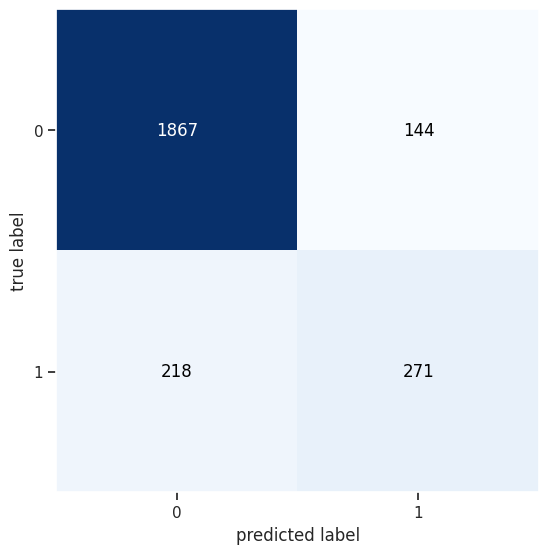

In [46]:
cm = confusion_matrix(y_test, y_pred_xgb)
_ = plot_confusion_matrix(cm)

In [68]:
accuracy_score(y_test, y_pred_xgb)

0.8552

## <a name='5.3'></a>5.3 Catboost

In [74]:
catboost = CatBoostClassifier()

catboost.fit(X_train, y_train, verbose=0)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2011
           1       0.59      0.71      0.64       489

    accuracy                           0.85      2500
   macro avg       0.76      0.79      0.77      2500
weighted avg       0.86      0.85      0.85      2500



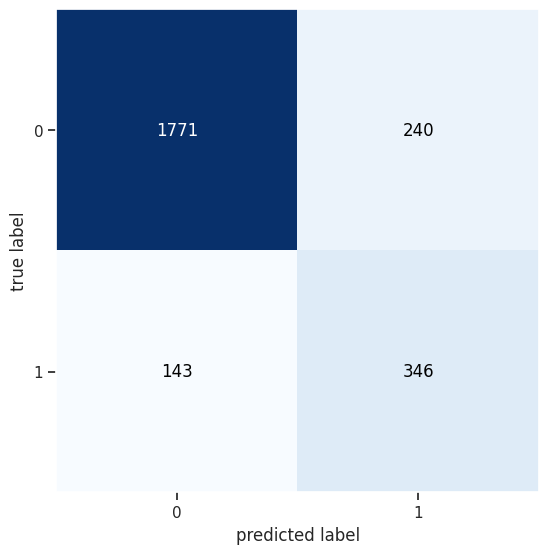

In [75]:
y_pred_cat = catboost.predict(X_test)
print(classification_report(y_test, y_pred_cat))
cm = confusion_matrix(y_test, y_pred_cat)
_ = plot_confusion_matrix(cm)

In [76]:
accuracy_score(y_test, y_pred_cat)

0.8468

Comparing the results of the three models - CatBoost, XGBoost, and Random Forest Classifier, it can be observed that each of them achieved good results, but the Random Forest Classifier appears to be the best-performing model. It has the highest accuracy (87%) and relatively high precision, recall, and f1-score for both classes.

Despite Random Forest Classifier showing the highest overall performance among the three models, CatBoost demonstrates superior prediction capabilities specifically for class 1. With a precision of 59% and a recall of 71% for class 1, CatBoost outperforms the other models in correctly identifying instances belonging to this class.